In [10]:
import matplotlib.pyplot as plt
import numpy as np
from src.data_processing import load_profile_data
from src.moho_inversion import run_inversion

# --- Model Parameters ---
INPUT_FILE = "data/synthetic_profile_data.csv"
COMPENSATION_DEPTH_KM = 35.0
NUM_ITERATIONS = 1

In [3]:
# Load the synthetic data
print(f"Loading data from '{INPUT_FILE}'...")
dist_m, topo_m, bouguer_ms2 = load_profile_data(INPUT_FILE)
print("Data loaded successfully.")

Loading data from 'data/synthetic_profile_data.csv'...
Data loaded successfully.


In [11]:
# Run the inversion algorithm
print(f"Running inversion for {NUM_ITERATIONS} iterations...")
final_moho_depth, history = run_inversion(
    bouguer_data=bouguer_ms2,
    topo_data=topo_m,
    distance_m=dist_m,
    compensation_depth_d=COMPENSATION_DEPTH_KM * 1000,
    num_iterations=NUM_ITERATIONS,
)
print("Inversion complete.")

Running inversion for 1 iterations...
--- Running Iteration 1 ---
-> Iteration 1: Found negative root values (min: -879.36 m). Applying fix.
Inversion complete.


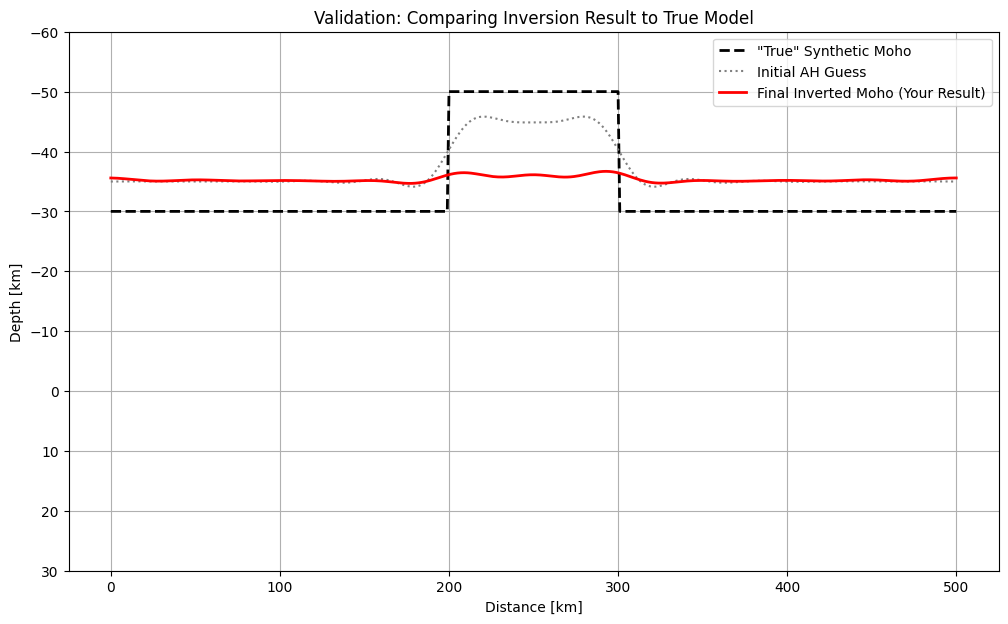

In [12]:
# 1. Re-create the "True" Synthetic Moho Root to use as a benchmark
true_root_bounds = [200e3, 300e3] 
true_root_depth = 20e3 # 20 km thick root
true_compensation_depth = 30e3

true_moho_root_m = np.zeros_like(dist_m, dtype=float)
root_mask = (dist_m >= true_root_bounds[0]) & (dist_m <= true_root_bounds[1])
true_moho_root_m[root_mask] = true_root_depth

# 2. Plot all three curves for comparison
dist_km = dist_m / 1000
plt.figure(figsize=(12, 7))

# Plot the "True" model (the actual answer)
true_moho_depth_km = (true_compensation_depth + true_moho_root_m) / 1000
plt.plot(dist_km, -true_moho_depth_km, 'k--', label='"True" Synthetic Moho', lw=2)

# Plot the initial guess (from history)
initial_moho_depth_km = (history["moho_root"][0] + COMPENSATION_DEPTH_KM * 1000) / 1000
plt.plot(dist_km, -initial_moho_depth_km, ':', label='Initial AH Guess', color='gray')

# Plot your final inverted result
final_moho_depth_km = final_moho_depth / 1000
plt.plot(dist_km, -final_moho_depth_km, 'r-', label='Final Inverted Moho (Your Result)', lw=2)


plt.title('Validation: Comparing Inversion Result to True Model')
plt.xlabel('Distance [km]')
plt.ylabel('Depth [km]')
plt.ylim(-60, 30) 
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.show()